In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


In [ ]:
#read the file
raw_df = pd.read_csv('Life Expectancy Data.csv')
raw_df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
raw_df = pd.read_csv("Life Expectancy Data.csv")

# Clean the column name just in case
raw_df.columns = raw_df.columns.str.strip()

# Confirm values inside Status
print(raw_df["Status"].unique())


['Developing' 'Developed']


In [ ]:
df = raw_df.copy()
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Strip spaces in values (important!)
raw_df["Status"] = raw_df["Status"].str.strip()

# Assign raw_df to df
df = raw_df.copy()

# Map to 0 (Developing) and 1 (Developed)
df["Status"] = df["Status"].map({"Developed": 1, "Developing": 0})

In [ ]:
df["Status"].value_counts()

,count
Status,
0,2426
1,512


In [ ]:
# Drop non-useful columns
df = df.drop(columns=["Country", "Year"])

# Split into features (X) and target (y)
X = df.drop("Life expectancy", axis=1)
y = df["Life expectancy"]


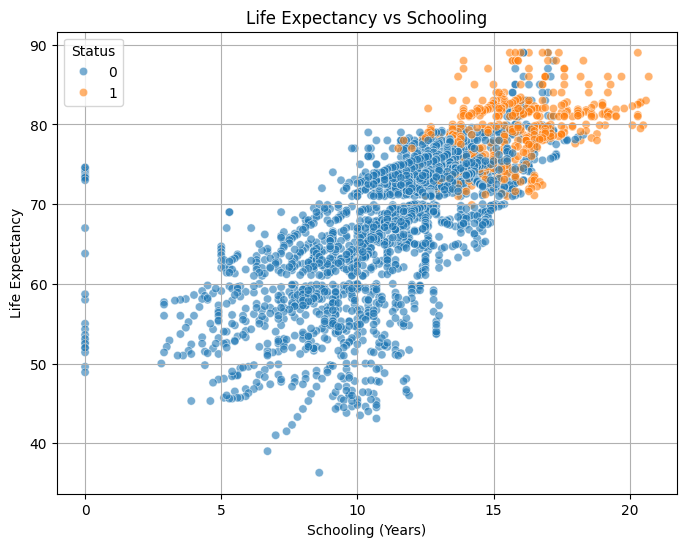

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Schooling", y="Life expectancy", hue="Status", alpha=0.6)
plt.title("Life Expectancy vs Schooling")
plt.xlabel("Schooling (Years)")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()


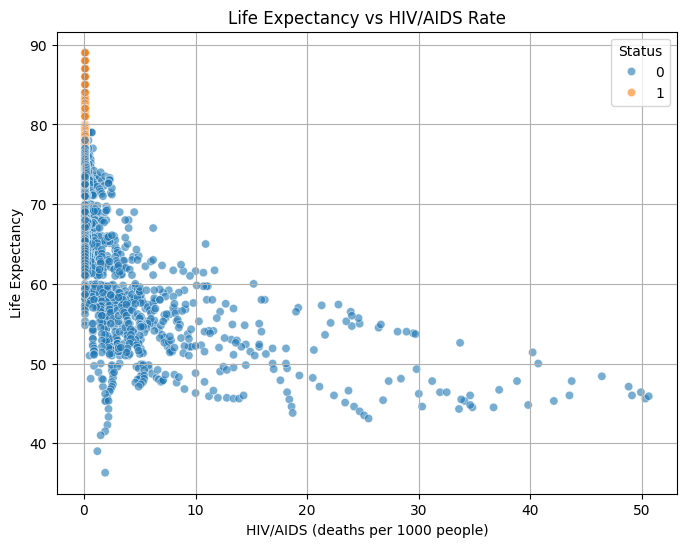

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="HIV/AIDS", y="Life expectancy", hue="Status", alpha=0.6)
plt.title("Life Expectancy vs HIV/AIDS Rate")
plt.xlabel("HIV/AIDS (deaths per 1000 people)")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()


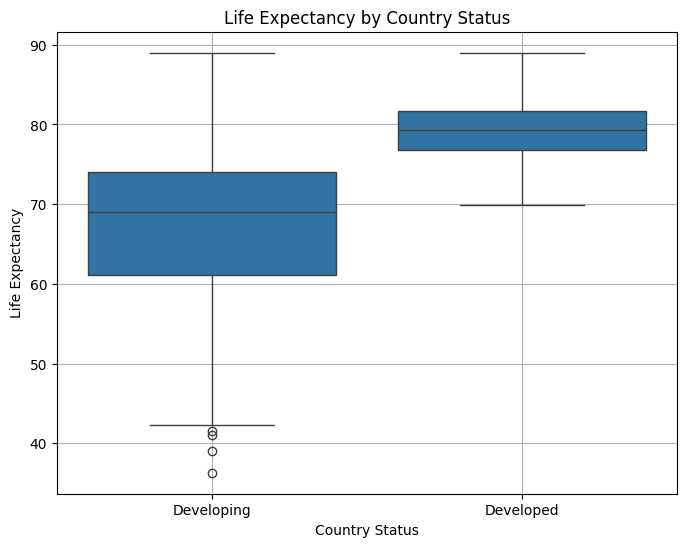

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Status", y="Life expectancy")
plt.xticks([0, 1], ['Developing', 'Developed'])
plt.title("Life Expectancy by Country Status")
plt.xlabel("Country Status")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()


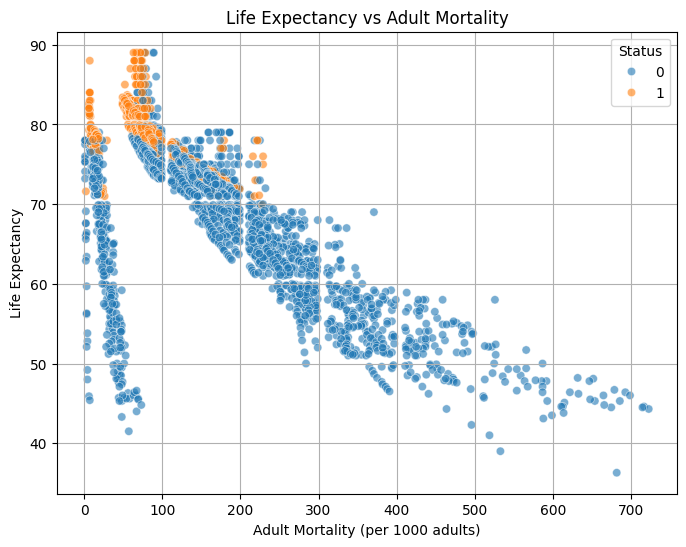

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Adult Mortality", y="Life expectancy", hue="Status", alpha=0.6)
plt.title("Life Expectancy vs Adult Mortality")
plt.xlabel("Adult Mortality (per 1000 adults)")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()


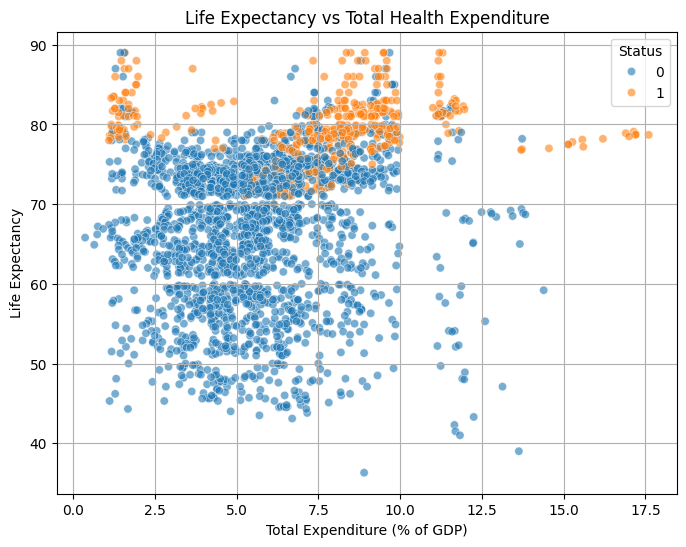

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Total expenditure", y="Life expectancy", hue="Status", alpha=0.6)
plt.title("Life Expectancy vs Total Health Expenditure")
plt.xlabel("Total Expenditure (% of GDP)")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()


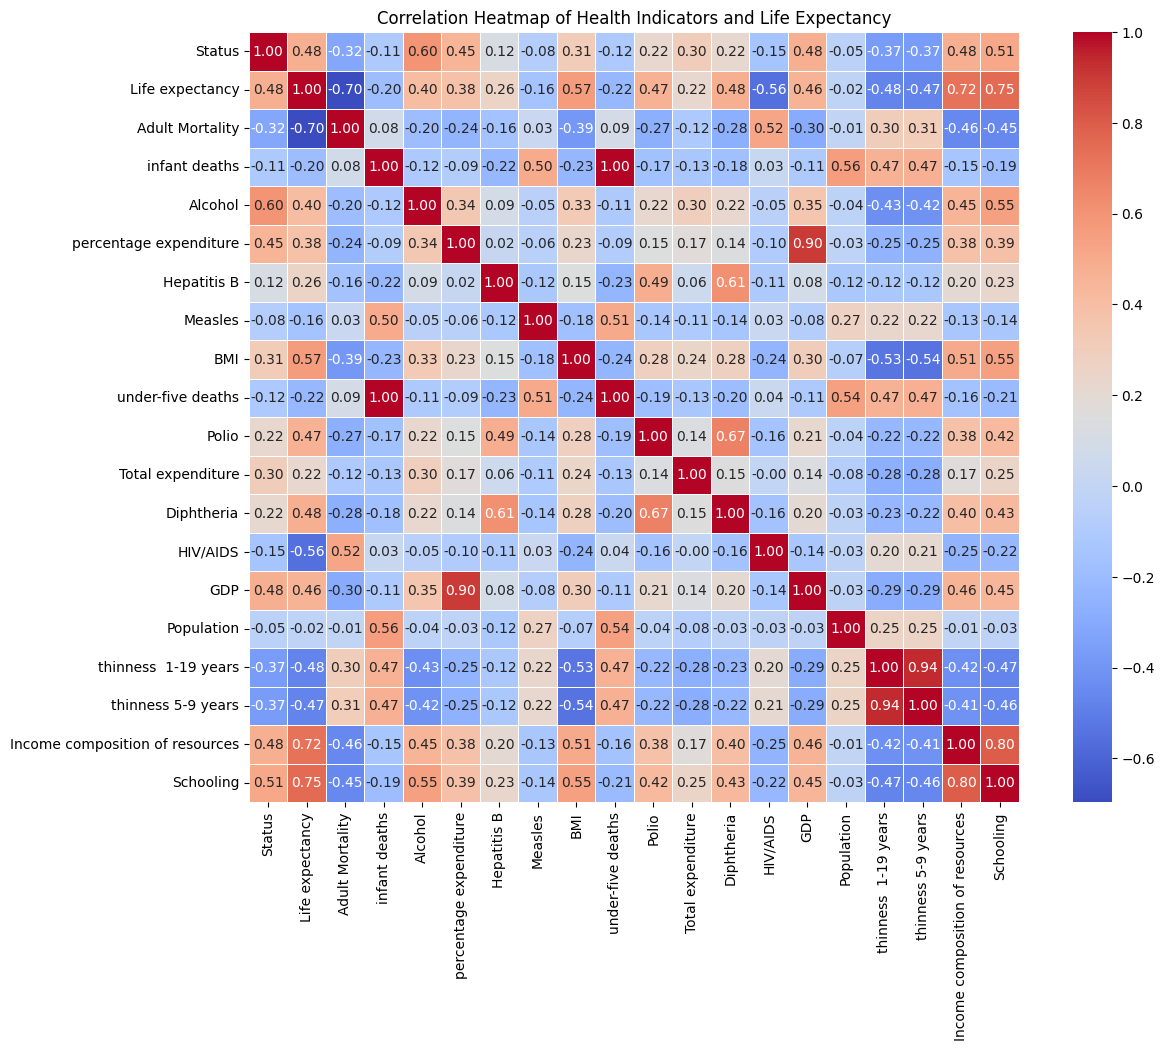

In [ ]:
plt.figure(figsize=(14, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)
plt.title("Correlation Heatmap of Health Indicators and Life Expectancy")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the shape
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (2350, 19)
Test shape: (588, 19)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import pandas as pd # Import pandas to handle DataFrame operations

# Initialize the model
model = LinearRegression()

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Combine X_train and y_train to easily drop rows with missing y values
train_data = X_train.copy()
train_data['Life expectancy'] = y_train

# Drop rows where the target variable is NaN
train_data.dropna(subset=['Life expectancy'], inplace=True)

# Separate X_train and y_train again
X_train_cleaned = train_data.drop('Life expectancy', axis=1)
y_train_cleaned = train_data['Life expectancy']


# Create a pipeline that first imputes missing values and then trains the model
pipeline = make_pipeline(imputer, model)

# Train the pipeline on the cleaned training data
pipeline.fit(X_train_cleaned, y_train_cleaned)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Make predictions on test data using the pipeline
y_pred = pipeline.predict(X_test)

# Combine y_test and y_pred to easily drop rows with missing y_test values
test_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Drop rows where y_test is NaN
test_results.dropna(subset=['y_test'], inplace=True)

# Separate y_test and y_pred again
y_test_cleaned = test_results['y_test']
y_pred_cleaned = test_results['y_pred']

# Evaluation metrics
r2 = r2_score(y_test_cleaned, y_pred_cleaned)
mae = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
rmse = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned))

print(f"R² Score      : {r2:.4f}")
print(f"MAE           : {mae:.2f}")
print(f"RMSE          : {rmse:.2f}")

R² Score      : 0.8257
MAE           : 2.85
RMSE          : 3.89


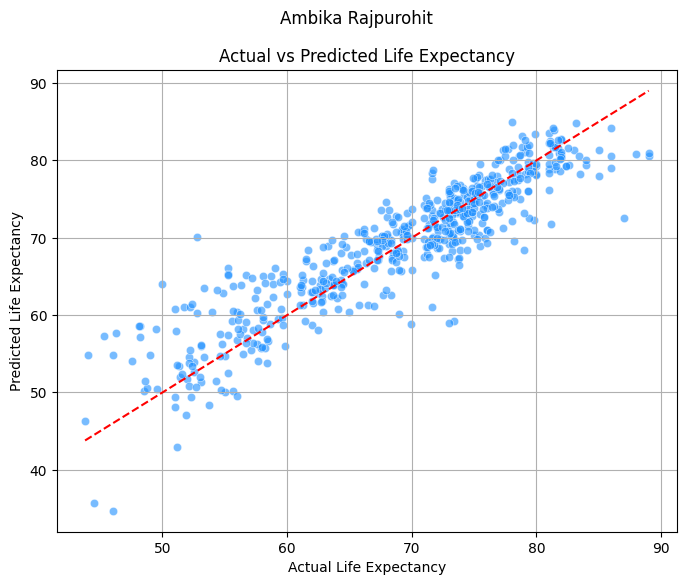

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.suptitle("Ambika Rajpurohit")
plt.grid(True)
plt.show()

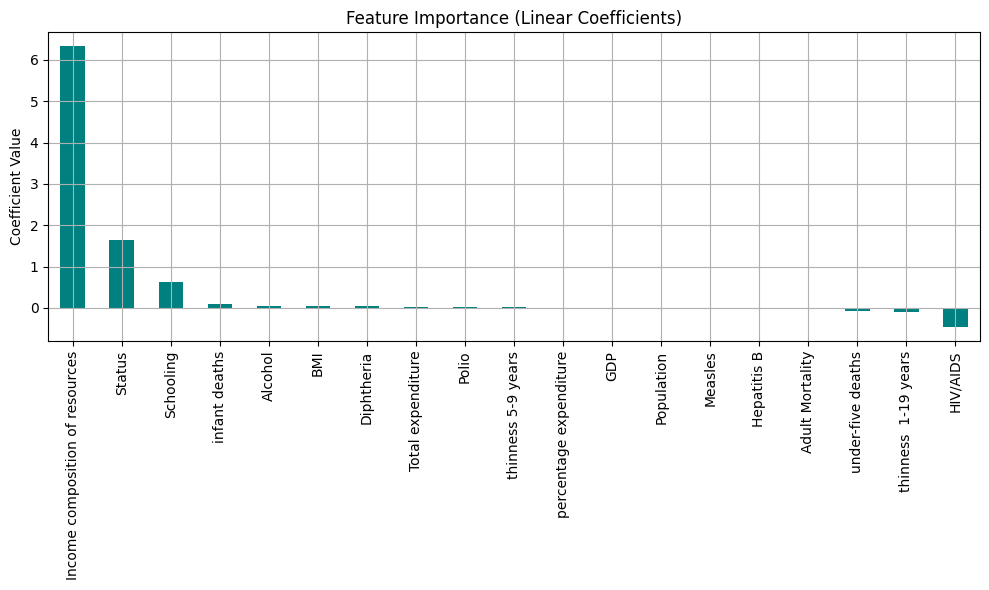

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get coefficients
coeffs = model.coef_
features = X.columns

# Create a sorted bar plot
importance = pd.Series(coeffs, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importance.plot(kind='bar', color='teal')
plt.title("Feature Importance (Linear Coefficients)")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()


Predicted life expectancy based on health, economic, and social indicators using a regression model on the WHO Life Expectancy dataset.